In [1]:
import tensorflow as tf
import numpy as np
import os 

def get_names(graph=tf.get_default_graph()):
    return [t.name for op in graph.get_operations() for t in op.values()]

In [4]:
model_dir = ".models\\bert-prune-40-squad"
# model_dir = "models\\uncased-bert-prunable"

sess = tf.InteractiveSession()

saver = tf.train.import_meta_graph(os.path.join(model_dir, 'model.ckpt.meta'))
saver.restore(sess, os.path.join(model_dir, 'model.ckpt'))

# get the graph
g = tf.get_default_graph()
w1 = g.get_tensor_by_name('bert/encoder/layer_0/attention/self/query/weights:0')
print(f"Proportion masked: {np.count_nonzero(w1.eval() == 0)/np.size(w1.eval())}")

c:\Users\jimdi\Documents\UCL\SNLP-Coursework\main-paper-code\contextual-repr-manifolds-master\.venv\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from .models\bert-prune-40-squad\model.ckpt
Proportion masked: 0.0


In [7]:
w1.eval()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [18]:
prefix = 'bert/encoder/layer_'

locations = ['/attention/self/query/weights/masked_weight:0',
'/attention/self/key/weights/masked_weight:0',
'/attention/self/value/weights/masked_weight:0',
'/attention/output/fully_connected/weights/masked_weight:0',
'/intermediate/fully_connected/weights/masked_weight:0',
'/output/fully_connected/weights/masked_weight:0']

/attention/self/query/weights/masked_weight:0 proportion masked: 0.4000006781684028


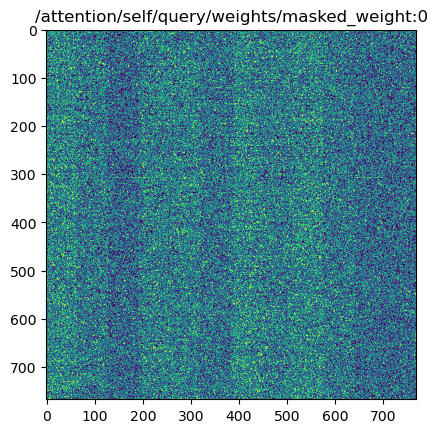

/attention/self/key/weights/masked_weight:0 proportion masked: 0.4000006781684028


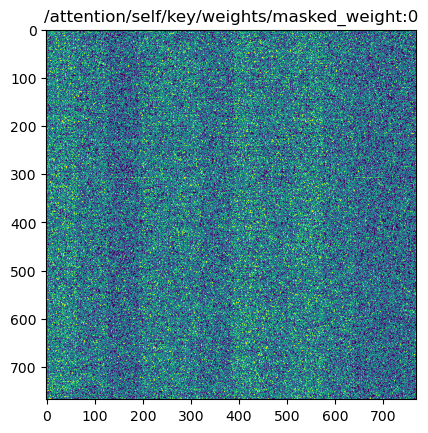

/attention/self/value/weights/masked_weight:0 proportion masked: 0.4000006781684028


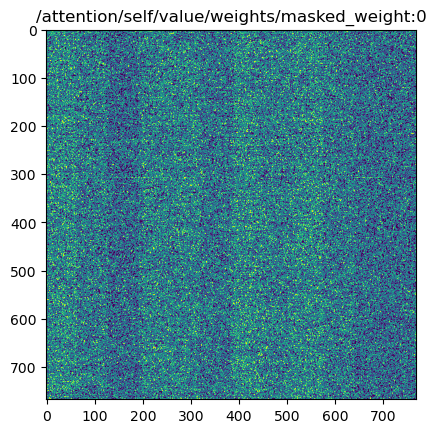

/attention/output/fully_connected/weights/masked_weight:0 proportion masked: 0.4000006781684028


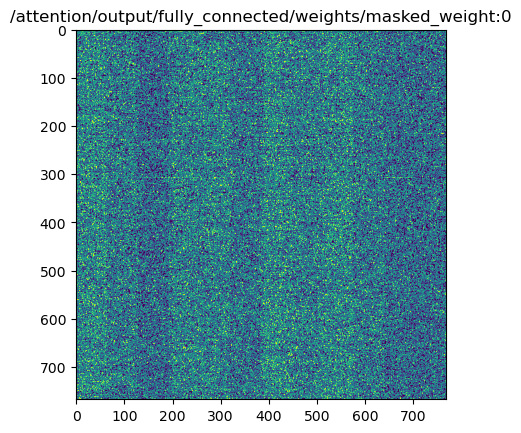

/intermediate/fully_connected/weights/masked_weight:0 proportion masked: 0.4000006781684028


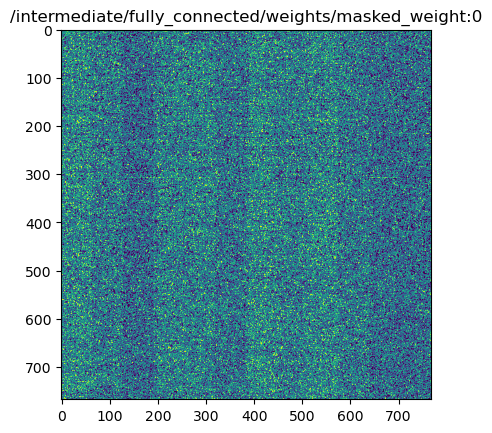

/output/fully_connected/weights/masked_weight:0 proportion masked: 0.4000006781684028


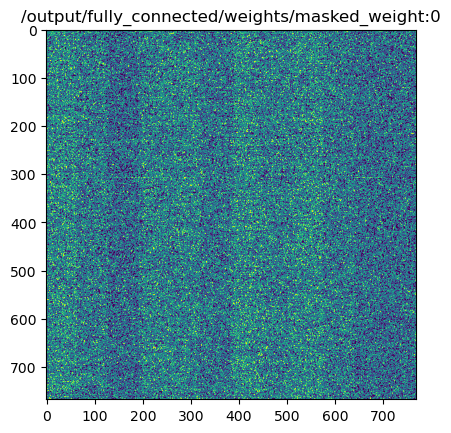

In [23]:
for i in [0]:
    g = tf.get_default_graph()
    for location in locations:
        weight_matrix = g.get_tensor_by_name(prefix + str(i) + location)

        print(f"{location} proportion masked: {np.count_nonzero(w1.eval() == 0)/np.size(w1.eval())}")
        plt.figure()
        plt.imshow(w1.eval()==0)
        plt.title(location)
        plt.xlabel('out node')
        plt.ylabel('in node')
        plt.show()

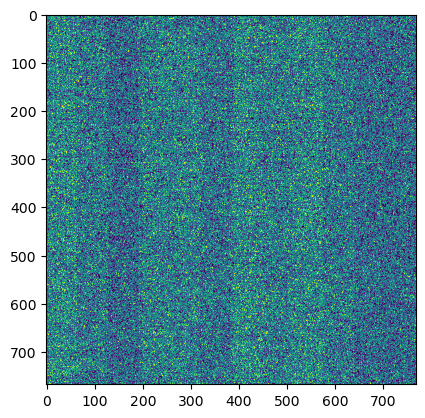

In [16]:
weights = w1.eval()
import matplotlib.pyplot as plt
# This is a (768, 768) array - plot it in a heatmap of neuron activations
plt.imshow(w1.eval()==0)


In [ ]:
30522

211.95833333333334

In [3]:
for op in g.get_operations():
  print(op.name)

global_step/Initializer/zeros
global_step
global_step/IsInitialized/VarIsInitializedOp
global_step/Assign
global_step/Read/ReadVariableOp
global_step/VarIsInitializedOp
global_step/cond/Switch
global_step/cond/switch_t
global_step/cond/switch_f
global_step/cond/pred_id
global_step/cond/Read/ReadVariableOp/Switch
global_step/cond/Read/ReadVariableOp
global_step/cond/Identity
global_step/cond/Switch_1
global_step/cond/Merge
global_step/add/y
global_step/add
Const
flat_filenames/shape
flat_filenames
TensorSliceDataset
FlatMapDataset
count
RepeatDataset
buffer_size
seed
seed2
ShuffleDataset
batch_size
num_parallel_calls
drop_remainder
MapAndBatchDataset
optimizations
OptimizeDataset
ModelDataset
IteratorV2
MakeIterator
IteratorToStringHandle
IteratorGetNext
bert/embeddings/ExpandDims/dim
bert/embeddings/ExpandDims
bert/embeddings/word_embeddings/Initializer/truncated_normal/shape
bert/embeddings/word_embeddings/Initializer/truncated_normal/mean
bert/embeddings/word_embeddings/Initializer/t